# Moving Window Functions

[Coding along with Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, Wes Mckinney, O'Reilly, 1st Edition October 2012; the source code for this chapter can be found at [](https://github.com/wesm/pydata-book/blob/3rd-edition/ch11.ipynb)]

In [37]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [38]:
data_file = "../../../assets/data/stock_px.csv"

In [39]:
close_px_all = pd.read_csv(data_file, parse_dates=True, index_col=0)

In [40]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [41]:
close_px_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [42]:
close_px_all.shape

(2214, 4)

In [43]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [44]:
close_px.resample('B').ffill()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

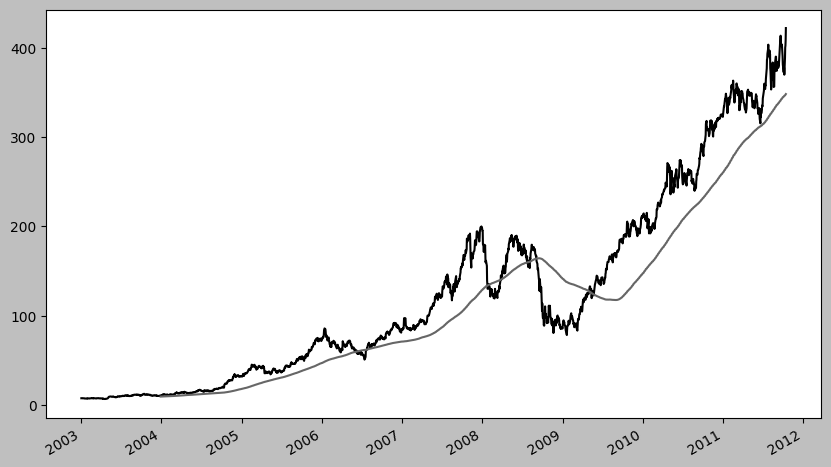

In [45]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

<Axes: >

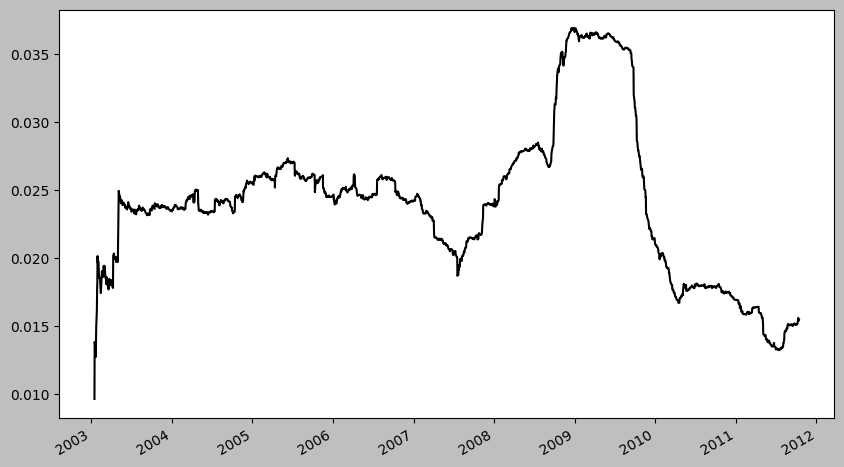

In [46]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

In [47]:
expanding_mean = std250.expanding().mean()

In [48]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

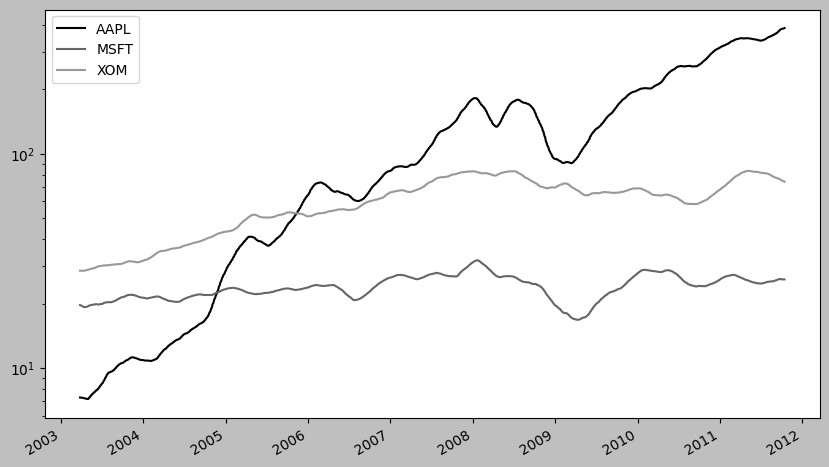

In [49]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [50]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


In [51]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

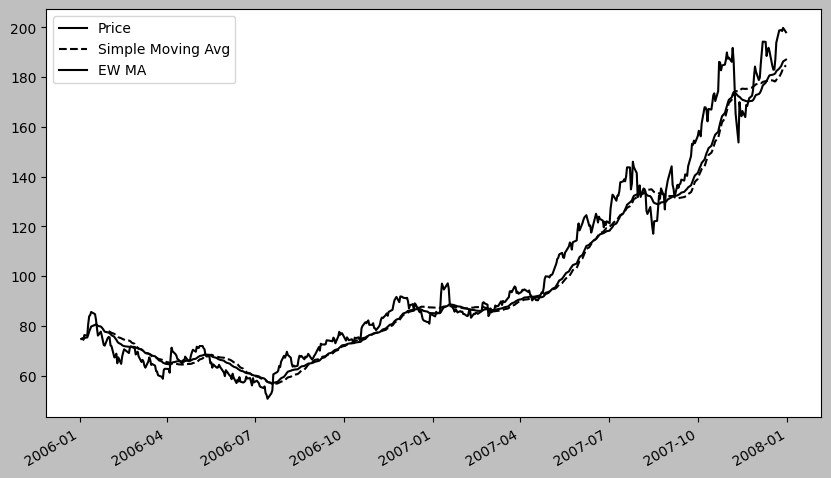

In [52]:
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend()

In [53]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [54]:
spx_px = close_px_all["SPX"]
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<Axes: >

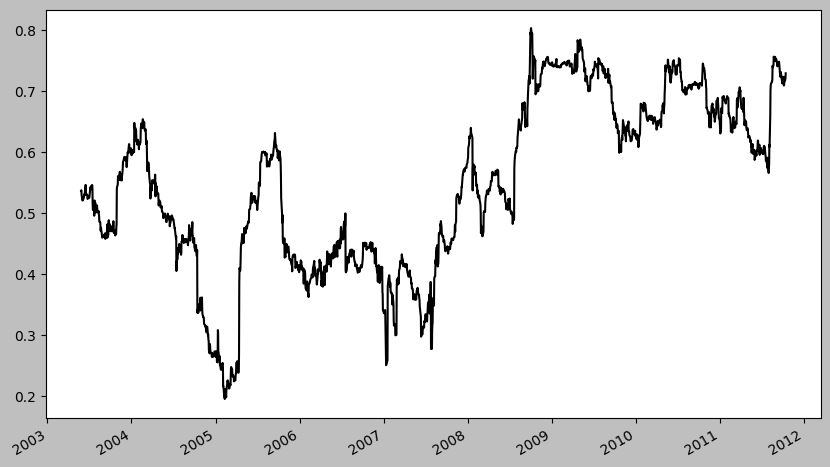

In [55]:
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [56]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

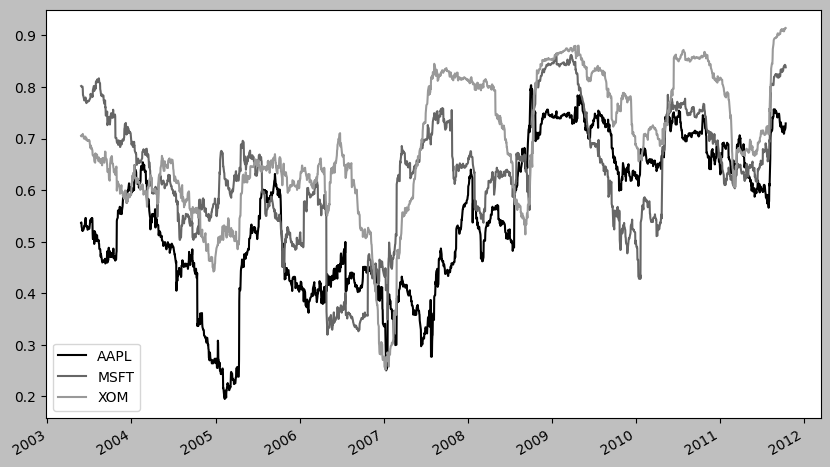

In [57]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [58]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

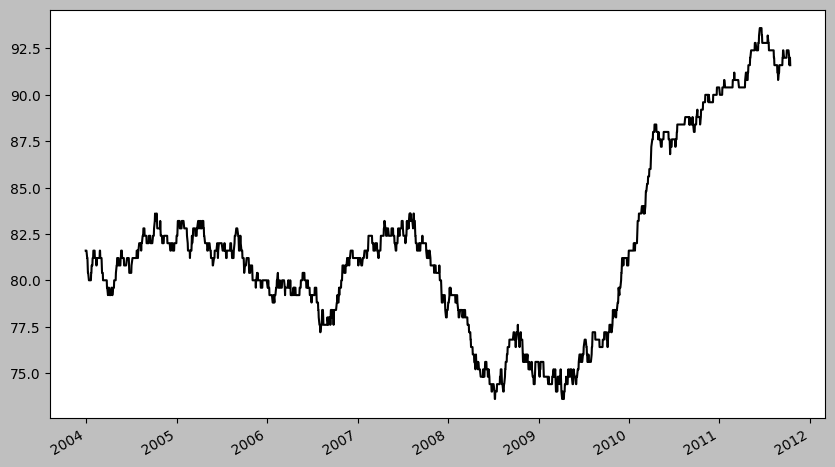

In [59]:
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()

In [60]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS